In [1]:
# config box
d = {"key":"val", "key1":"val1"}

In [2]:
d['key1']

'val1'

In [3]:
d.key1

AttributeError: 'dict' object has no attribute 'key1'

In [ ]:
from box import ConfigBox

In [ ]:
d2 = ConfigBox({"key":"val", "key1":"val1"})

In [ ]:
d2.key1

'val1'

In [ ]:
type(d2)

box.config_box.ConfigBox

In [ ]:
type(d)

dict

In [ ]:
# ensure annotations 

def get_prodict(x:int, y:int) -> int:
    return x*y

In [ ]:
get_prodict(x=2, y=3)

6

In [ ]:
get_prodict(x=2, y="3")

'33'

In [ ]:
from ensure import ensure_annotations

In [ ]:
@ensure_annotations
def get_prodict(x:int, y:int) -> int:
    return x*y

In [ ]:
get_prodict(x=2, y=3)

6

In [ ]:
get_prodict(x=2, y="3")

EnsureError: Argument y of type <class 'str'> to <function get_prodict at 0x000002E636EE5C10> does not match annotation type <class 'int'>

## Donwload data from gdrive

In [ ]:
import gdown

In [ ]:
url="https://drive.google.com/file/d/1vlhZ5c7abUKF8xXERIw6m9Te8fW7ohw3/view?usp=sharing"

In [ ]:
file_id = url.split("/")[-2]
file_id

'1vlhZ5c7abUKF8xXERIw6m9Te8fW7ohw3'

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import tensorflow as tf

tf.random.set_seed(42)

valid_datagen=ImageDataGenerator(rescale=1./255)


test_dir="C:/Users/bijin/Documents/projects/End-to-end-food-ml-project/End-to-end-food-ml-project/artifacts/data_ingestion/pizza_steak/test"

In [5]:
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

Found 500 images belonging to 2 classes.


In [7]:
model = load_model(os.path.join("C:/Users/bijin/Documents/projects/End-to-end-food-ml-project/End-to-end-food-ml-project/model", "model.h5"))
pred=model.predict(valid_data)

16/16 [==============================] - 9s 529ms/step


In [10]:
pred

array([[0.63272166],
       [0.02222264],
       [0.9446831 ],
       [0.0162341 ],
       [0.02057346],
       [0.97992504],
       [0.32718387],
       [0.16284283],
       [0.58324414],
       [0.9741788 ],
       [0.04684114],
       [0.12536578],
       [0.5240834 ],
       [0.3173686 ],
       [0.9617934 ],
       [0.9879227 ],
       [0.57774746],
       [0.03830503],
       [0.7683492 ],
       [0.6563587 ],
       [0.6640609 ],
       [0.5877918 ],
       [0.79093444],
       [0.77790374],
       [0.11116438],
       [0.8717459 ],
       [0.89913154],
       [0.12859945],
       [0.07188935],
       [0.7785932 ],
       [0.98390144],
       [0.41228816],
       [0.8805858 ],
       [0.00710074],
       [0.0345405 ],
       [0.9824429 ],
       [0.62819356],
       [0.16200057],
       [0.13358966],
       [0.5092814 ],
       [0.8712809 ],
       [0.30942824],
       [0.8613637 ],
       [0.09803605],
       [0.06434377],
       [0.01298364],
       [0.13471703],
       [0.164

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [12]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [13]:

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)
  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [14]:
cn=['pizza', 'steak']

1/1 [==============================] - 0s 227ms/step
[[0.05002953]]


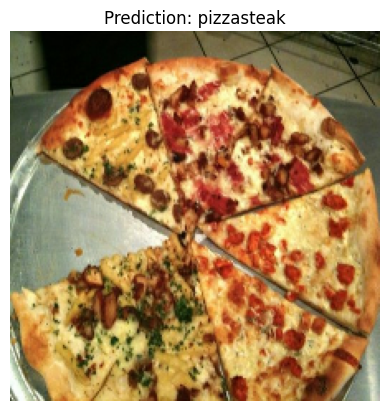

In [15]:
imgd=r'C:\Users\bijin\Documents\projects\End-to-end-food-ml-project\End-to-end-food-ml-project\inputImage.jpg'
pred_and_plot(model, imgd,cn )